<a href="https://colab.research.google.com/github/hch507/mnist-classification/blob/main/mnist_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt 

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))


11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(len(x_train))
print(x_train.shape)
print(len(y_train))
print(y_train.shape)
print(len(x_test))
print(x_test.shape)
print(len(y_test))
print(y_test.shape)

60000
(60000, 28, 28, 1)
60000
(60000,)
10000
(10000, 28, 28, 1)
10000
(10000,)


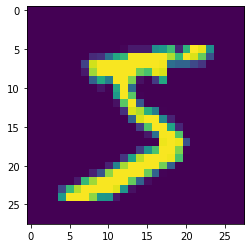

In [5]:
plt.imshow(x_train[0,:,:,0])

In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [26]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 128)       147584    
                                                                 
 flatten_1 (Flatten)         (None, 12800)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1638528   
                                                      

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model.fit(x_train, y_train,
          epochs=10,
          validation_split = 0.3)

Epoch 1/10
1313/1313 [==============================] - 11s 8ms/step - loss: 0.1143 - accuracy: 0.9645 - val_loss: 0.0633 - val_accuracy: 0.9817
Epoch 2/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0378 - accuracy: 0.9886 - val_loss: 0.0448 - val_accuracy: 0.9867
Epoch 3/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0249 - accuracy: 0.9920 - val_loss: 0.0524 - val_accuracy: 0.9852
Epoch 4/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0180 - accuracy: 0.9935 - val_loss: 0.0428 - val_accuracy: 0.9891
Epoch 5/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0134 - accuracy: 0.9955 - val_loss: 0.0448 - val_accuracy: 0.9884
Epoch 6/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0122 - accuracy: 0.9962 - val_loss: 0.0459 - val_accuracy: 0.9881
Epoch 7/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0093 - accuracy: 0.9974 - val_loss: 0.0520 - val_accu

In [29]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0613 - accuracy: 0.9879


[0.06125611066818237, 0.9879000186920166]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


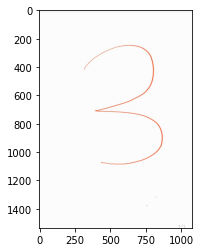

In [33]:
from google.colab import drive
import cv2
import numpy as np
drive.mount('/content/drive')
image = '/content/drive/MyDrive/Colab Notebooks/thrid.jpeg'
test_image = cv2.imread(image, cv2.IMREAD_COLOR)

plt.imshow(test_image)

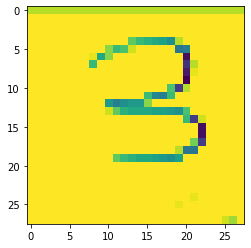

In [34]:
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

test_image = cv2.resize(test_image, (28,28),interpolation=cv2.INTER_AREA)
test_image = test_image / 255.0

plt.imshow(test_image)

In [35]:
test_image = test_image.reshape((1, 28, 28, 1))
pred = model.predict(test_image)


In [36]:
pred

array([[0.11777699, 0.15600762, 0.08173499, 0.08277969, 0.07837152,
        0.0852251 , 0.08417349, 0.13434753, 0.08143025, 0.09815281]],
      dtype=float32)

In [37]:
np.argmax(pred)

1